In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [219]:
# reading the dataset
Df=pd.read_csv('titanic_train.csv')
Df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Problem statement: We have the 891 datapoints and 12 features
                   Our aim is to predict the passenger is Survived or not using given features

Before prediction we need to preprocess the given data set 

Preprocessing : finding null values\n
                finding duplicates\n
                replace/remove the null values\n 
                drop the duplicates\n
                Any categorical feature present we need to convert categorical features in to vector\n
                

In [220]:
# Finding missing data

Df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [221]:
Df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177 NaN values in Age column \n 687 NaN values in Cabin column \n 2 NaN values in Embarked column 

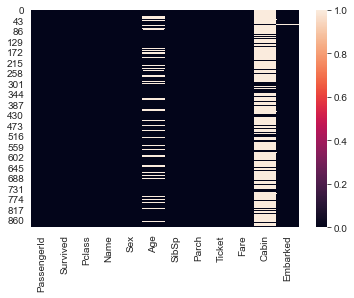

In [222]:
# We can see the null values with visualization also 

sns.heatmap(Df.isnull())

Heat map tells us which column as null values

In [223]:
Age_missing=Df['Age'].isnull().sum()
Age_missing

177

In [224]:
# percentage of missing values in Age column

Percentage_Age=Age_missing/Df.shape[0]
Percentage_Age

0.19865319865319866

Aprox 20% of Age column data missing

In [225]:
Cabin_missing=Df['Cabin'].isnull().sum()
Cabin_missing

687

In [226]:
# percentage of missing values in Cabin column
Percentage_Cabin=Cabin_missing/Df.shape[0]
Percentage_Cabin

0.7710437710437711

Aprox 77% of Cabin column data missing 

Our main aim to predict the survived or not 

we have 2 classes 0 and 1 

0 : Not survive
1: survive 

First we need to check class count

In [227]:
Df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [228]:
Df['Sex'].value_counts()/Df.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

We have 549 not survived class and 342 survive class

Given data set is imbalanced dataset

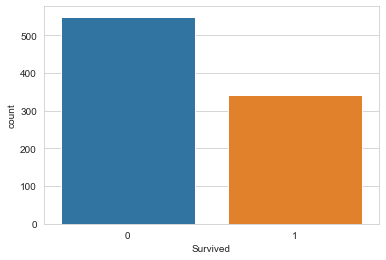

In [229]:
# we can also visualize it using seaborn

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=Df)

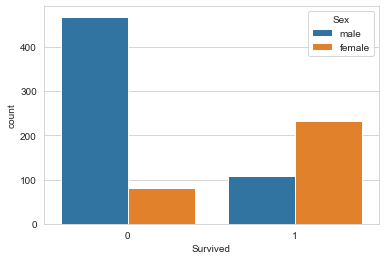

In [230]:
# If you want to know how many people survived or not on gender basis 

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=Df)

According to the given dataset  by visualizing it we know that 400+ male not survived and female aprox 70 not servived 
approx 220 females servived and approx 110 male servived

In [231]:
# passenger classes

Df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

According to the data set ship contains 3 classes

class 1 : richer people = 216
class 2:  middle class people =184
class 3: poor people = 491

In [232]:
Df['Pclass'].value_counts()/Df.shape[0]

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Dataset contain 25% class1 20% class2 55% class3

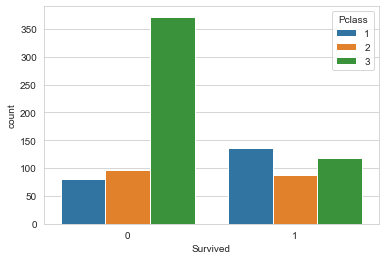

In [233]:
# Now we can visualize how percentage people surived based on Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Df)

By visualizing the Pclass  350 + class3(poor) people out of 491 people  not survived ,aprox 90 class2(middle class) people out of 184 not survied and aprox 60 to 70 class1 people(rich) out of 216 people not survived 

By seeing the visualization class1 people survived more than other classes


In [234]:
# Plotting the histogram to find the avg age of passenger

Df['Age'].mean()

29.69911764705882

In [235]:
Df['Age'].max()

80.0

In [236]:
Df['Age'].median()

28.0

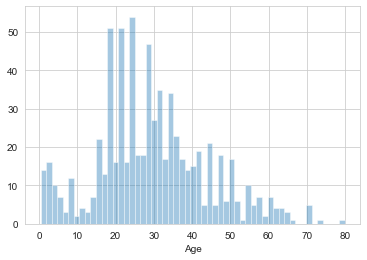

In [237]:
sns.distplot(Df['Age'].dropna(),kde=False,bins=55)

By visulazing the age column we know that most of the people in between 20 to 30 age

In [238]:
Df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

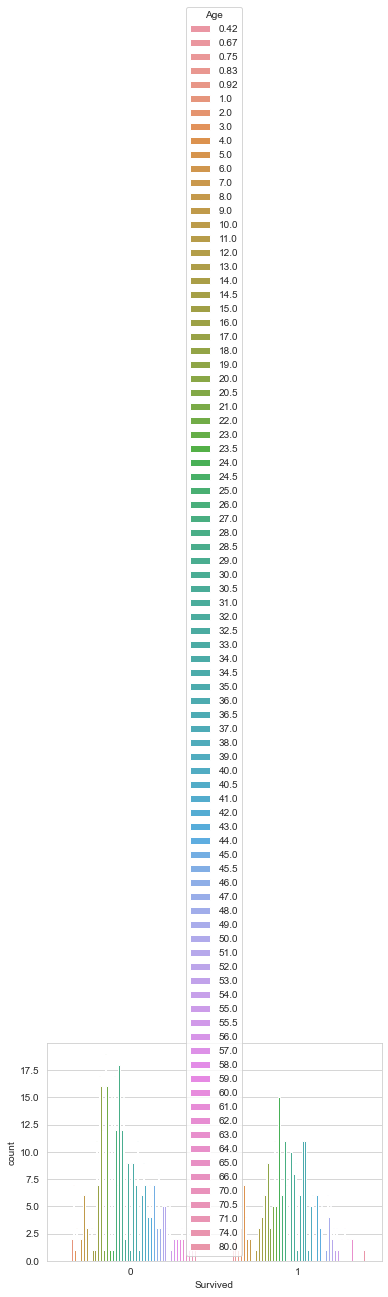

In [239]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Age',data=Df)

In [240]:
# sibsp

Df['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

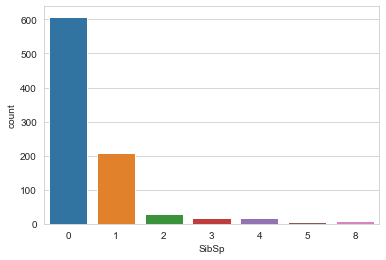

In [241]:
sns.countplot(x='SibSp',data=Df)

In [242]:
Df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

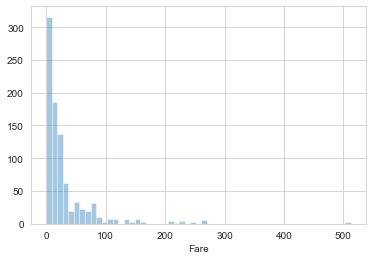

In [243]:
sns.distplot(Df['Fare'].dropna(),kde=False,bins=55)

By visualzing the all the dataset we have NaN values in Age and cabin columns

Now we need to remove the null values

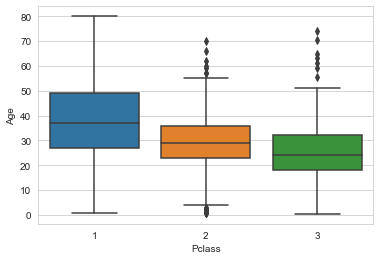

In [244]:
sns.boxplot(x='Pclass',y='Age',data=Df)

From the boxplot we know that the avg age of class1 is 35-37 and avg age of class2 is 28-29 and avg age of class3 is 24-27 
Now we fill the NaN values of age with avg values of Pclass

In [245]:
# filling NaN values in age using their pclass

def fill(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 36
        elif Pclass==2:
            return 27
        else:
            return 25
    else:
        return Age

In [246]:
# filling NaN values using function 
Df['Age']=Df[['Age','Pclass']].apply(fill,axis=1)

In [247]:
Df['Age'].isnull().sum()

0

In [248]:
Df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

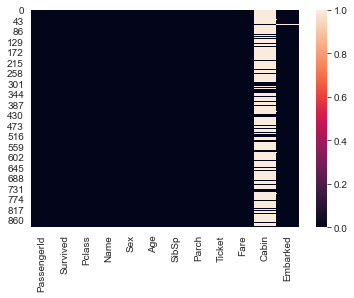

In [249]:
sns.heatmap(Df.isnull())

If we observe the above heatmap we do not have any NaN values 

Now we need to fill the NaN values in Cabin column but Cabin column contain 77% null values so we drop that column from dataframe

In [250]:
Df.drop('Cabin',axis=1,inplace=True)

In [251]:
Df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Now we have 11 rows only so only because we drop the cabin column 

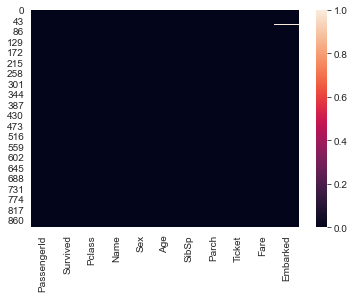

In [252]:
sns.heatmap(Df.isnull())

If we observe the heatmap we don't have any null values in dataframe 

In [253]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We have categorical features : Name, Sex, Embarked, Ticket
    
To predict the passenger survived or not Name,Ticket column not useful  so we drop them and we convert Sex and Embarked from categorical to numerical

In [254]:
# converting categorical features using pandas dummies

sex=pd.get_dummies(Df['Sex'])

In [255]:
embarked=pd.get_dummies(Df['Embarked'])

In [256]:
Df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [257]:
Df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [276]:
model_data=pd.concat([Df,sex,embarked],axis=1)

In [277]:
model_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


Conclusion : Upto now we analyze and visualize the data without using feature engineering 
             We fill the NaN values , We convert the categorical features

In [278]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\unify\anaconda3\envs\env2\python.exe -m pip install --upgrade pip' command.


In [279]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [280]:
model_data.drop(['PassengerId','Survived','Name','Ticket'],axis=1,inplace=True)


In [281]:
model_data.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [282]:
Y=Df['Survived']

In [283]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [287]:
# Feature selction using forward feature selection 

Result = sfs(RandomForestClassifier(n_estimators=100,n_jobs=-1),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'accuracy',
           cv = 5)

In [288]:
Result=Result.fit(model_data,Y)

In [289]:
Result.k_feature_names_

('Pclass', 'Age', 'Fare', 'female', 'Q')

By forward feature selection we get top 5 features

In [293]:
# Now we need to check features corelation
A=model_data['Pclass']

In [295]:
B=model_data['Age']

In [296]:
from scipy.stats import spearmanr

In [297]:
cofe,p=spearmanr(A,B)

In [300]:
cofe,p

(-0.396933948474777, 5.357291091841564e-35)

We are getting p-value less than 5% so according to the hypothesis testing p-value<5% then reject null hypothesis 
 so Age and Pclass features are different

In [301]:
C=model_data['female']

In [302]:
cofe1,p1=spearmanr(A,C)

In [304]:
cofe1,p1

(-0.13577453333860584, 4.7832782429159534e-05)

We are getting p-value less than 5% so according to the hypothesis testing p-value<5% then reject null hypothesis 
 so female and Pclass features are different

In [309]:
D=model_data['Fare']

In [310]:
cofe2,p2=spearmanr(A,D)

In [311]:
cofe2,p2

(-0.6880316726256098, 6.194553731421917e-126)

We are getting p-value less than 5% so according to the hypothesis testing p-value<5% then reject null hypothesis 
 so Fare and Pclass features are different

Note : The more different/orthogonal features are the better would your models will be when you combine all the features

In [315]:
# Finding outliers using LOF(local outlier factor)

import numpy as np
from sklearn.neighbors import LocalOutlierFactor 

In [318]:
outlier=LocalOutlierFactor(n_neighbors=5)
outlier.fit_predict(model_data)

array([-1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

LOF returns the nd-array which contains labes 1 and -1
 
1: inliers
-1: outliers